# 第2章 数据可视化

## 初始化

In [1]:
# 本章需要用到的库
import numpy as np # 导入numpy库
import pandas as pd # 导入pandas库
import matplotlib.pyplot as plt # 导入matplotlib库
import seaborn as sns # 导入seaborn库

# 设置初始化
plt.rcParams['font.sans-serif'] = ['SimHei'] # 用来正常显示中文标签
plt.rcParams['axes.unicode_minus'] = False # 用来正常显示负号

## 2.1 类别数据可视化

### 2.1.1 条形图

In [2]:
df = pd.read_csv('./pydata/chap01/example1_1.csv', encoding='gbk') # 读取csv文件
df.head() # 显示前5行

,社区,性别,态度
0,A社区,男,反对
1,B社区,女,反对
2,D社区,女,反对
3,C社区,男,反对
4,A社区,男,赞成


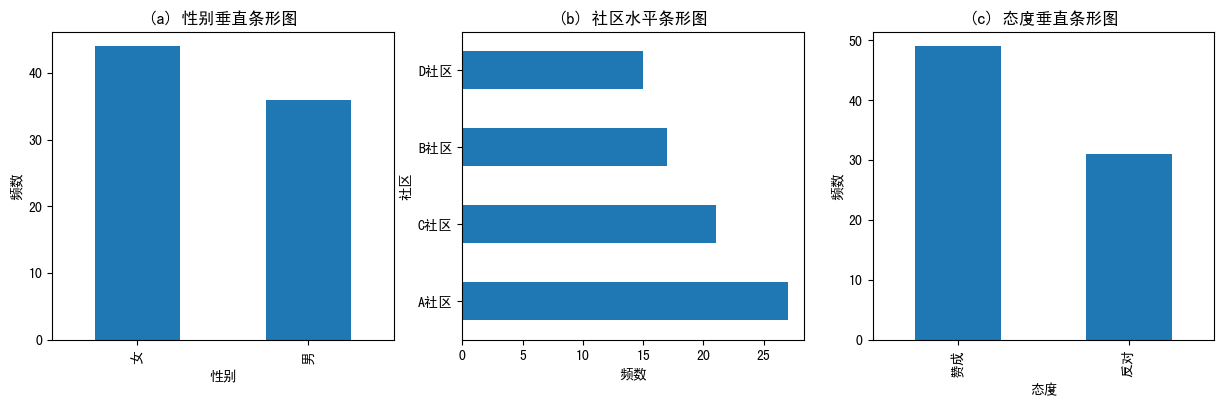

In [3]:
plt.subplots(1, 3, figsize=(15, 4)) # 设置画布大小 1行3列

plt.subplot(131) # 1行3列第1个图
t1 = df['性别'].value_counts() # 计算频数
t1.plot(kind='bar') # 绘制垂直条形图
plt.ylabel('频数') # 设置y轴标签
plt.title('(a) 性别垂直条形图') # 设置标题

plt.subplot(132) # 1行3列第2个图
t2 = df['社区'].value_counts() # 计算频数
t2.plot(kind='barh') # 绘制水平条形图
plt.xlabel('频数') # 设置x轴标签
plt.title('(b) 社区水平条形图') # 设置标题

plt.subplot(133) # 1行3列第3个图
t3 = df['态度'].value_counts() # 计算频数   
t3.plot(kind='bar') # 绘制垂直条形图
plt.ylabel('频数') # 设置y轴标签
plt.title('(c) 态度垂直条形图') # 设置标题

plt.show() # 显示图形

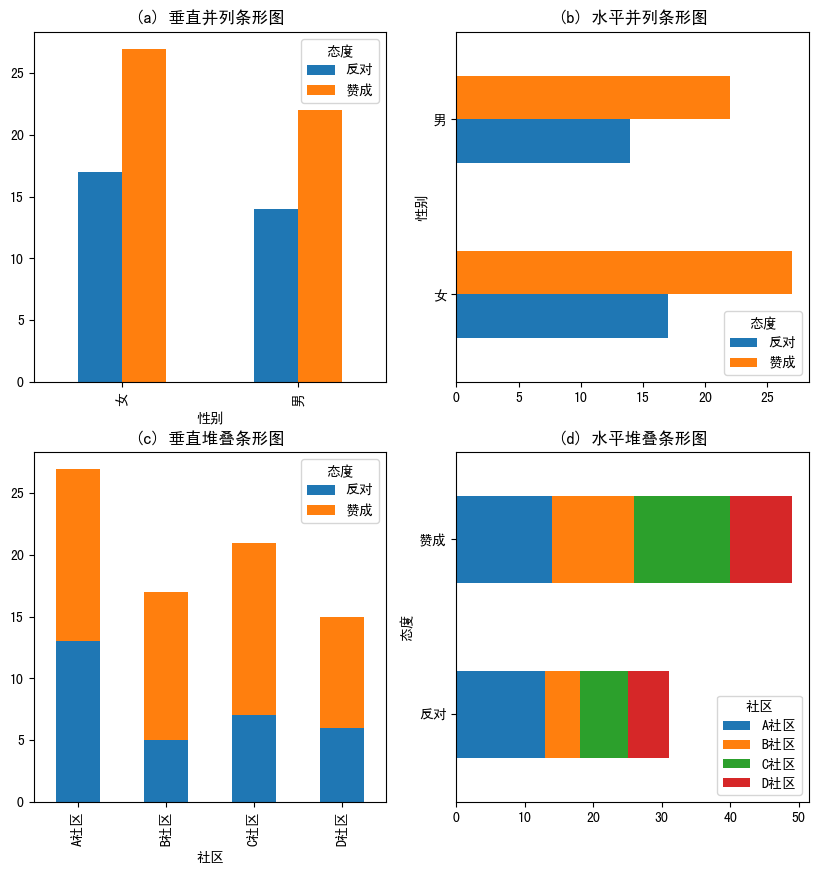

In [4]:
plt.subplots(2, 2, figsize=(10, 10)) # 设置画布大小 2行2列

# 并列条形图
t4 = pd.crosstab(df['性别'], df['态度']) # 交叉表

ax1 = plt.subplot(221) # 2行2列第1个图
t4.plot(kind='bar', ax=ax1) # 绘制垂直并列条形图
plt.title('(a) 垂直并列条形图') # 设置标题

ax2 = plt.subplot(222) # 2行2列第2个图
t4.plot(kind='barh', ax=ax2) # 绘制水平并列条形图
plt.title('(b) 水平并列条形图') # 设置标题

# 堆叠条形图
t5 = pd.crosstab(df['社区'], df['态度']) # 交叉表
ax3 = plt.subplot(223) # 2行2列第3个图
t5.plot(kind='bar', ax=ax3, stacked=True) # 绘制垂直堆叠条形图
plt.title('(c) 垂直堆叠条形图') # 设置标题

t6 = pd.crosstab(df['态度'], df['社区']) # 交叉表
ax4 = plt.subplot(224) # 2行2列第4个图
t6.plot(kind='barh', ax=ax4, stacked=True) # 绘制水平堆叠条形图
plt.title('(d) 水平堆叠条形图') # 设置标题

plt.show() # 显示图形

### 2.1.2 饼图和环形图

In [5]:
df = pd.read_csv('./pydata/chap02/example2_2.csv', encoding='gbk') # 读取csv文件
df.head() # 显示前5行

,支出项目,北京,天津,上海,重庆
0,食品烟酒,8488.5,8983.7,10952.6,6666.7
1,衣着,2229.5,1999.5,2071.8,1491.9
2,居住,15751.4,6946.1,15046.4,3851.2
3,生活用品及服务,2387.3,1956.7,2122.8,1392.5
4,交通通信,4979.0,4236.4,5355.7,2632.8


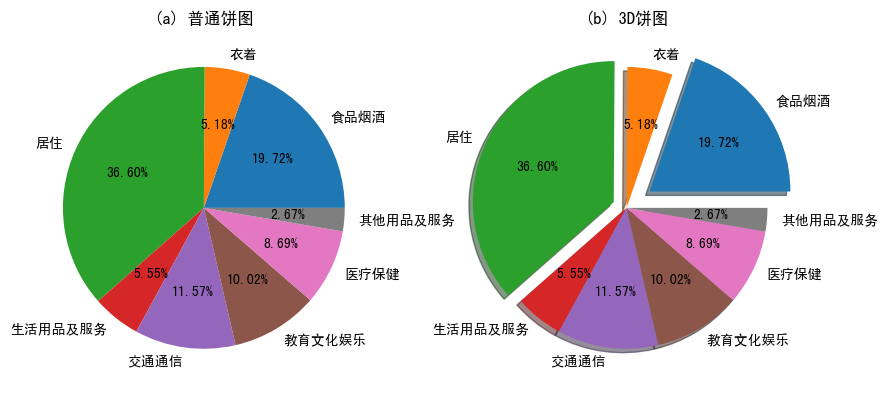

In [6]:
plt.subplots(1, 2, figsize=(10, 6)) # 设置画布大小 1行2列

plt.subplot(121) # 1行2列第1个图
plt.pie(df['北京'], labels=df['支出项目'], autopct='%1.2f%%') # 绘制饼图
plt.title('(a) 普通饼图') # 设置标题

plt.subplot(122) # 1行2列第2个图
plt.pie(
    df['北京'], labels=df['支出项目'], autopct='%1.2f%%', 
    shadow=True,
    explode=[0.2, 0, 0.1, 0, 0, 0, 0, 0]
) # 绘制饼图
plt.title('(b) 3D饼图') # 设置标题

plt.show() # 显示图形

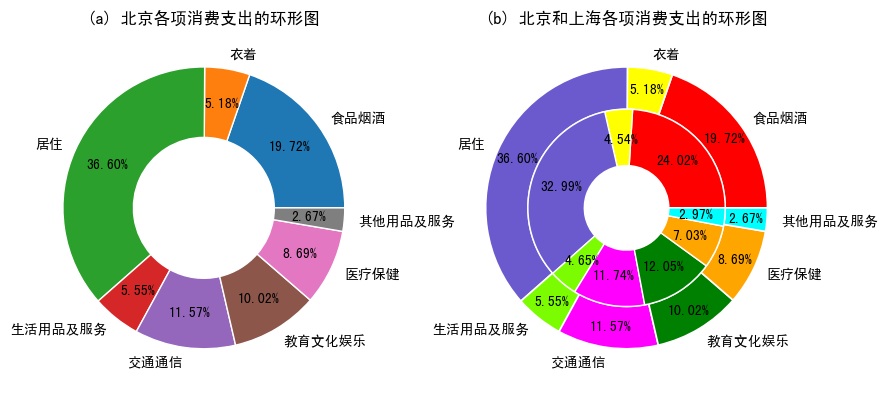

In [7]:
plt.subplots(1, 2, figsize=(10, 6)) # 设置画布大小 1行2列

plt.subplot(121) # 1行2列第1个图
plt.pie(
    df['北京'], labels=df['支出项目'], startangle=0, 
    autopct='%1.2f%%', pctdistance=0.75,
    wedgeprops={'width': 0.5, 'edgecolor': 'w'}
) # 绘制饼图
plt.title('(a) 北京各项消费支出的环形图') # 设置标题

plt.subplot(122) # 1行2列第2个图
colors = [
    'red', 'yellow', 'slateblue', 'lawngreen', 'magenta', 
    'green', 'orange', 'cyan', 'pink', 'gold'
] # 自定义颜色
plt.pie(
    df['北京'], labels=df['支出项目'], autopct='%1.2f%%',
    radius=1, pctdistance=0.85, 
    colors=colors,
    wedgeprops={'linewidth': 1.2, 'width': 0.3, 'edgecolor': 'w'}
) # 绘制饼图
plt.pie(
    df['上海'], autopct='%1.2f%%',
    radius=0.7, pctdistance=0.7, colors=colors,
    wedgeprops={'linewidth': 1, 'width': 0.4, 'edgecolor': 'w'}
) # 绘制饼图
plt.title('(b) 北京和上海各项消费支出的环形图') # 设置标题

plt.show() # 显示图形

## 2.2 数据分布可视化

### 2.2.1 直方图与核密度图

In [8]:
df = pd.read_csv('./pydata/chap02/example2_3.csv', encoding='gbk') # 读取csv文件
df.head() # 显示前5行

,日期,北京,上海,郑州,武汉,西安,沈阳
0,2020/1/1,62,54,73,73,117,109
1,2020/1/2,80,82,124,105,149,214
2,2020/1/3,82,72,192,130,209,204
3,2020/1/4,74,88,249,142,252,207
4,2020/1/5,83,63,276,80,152,198


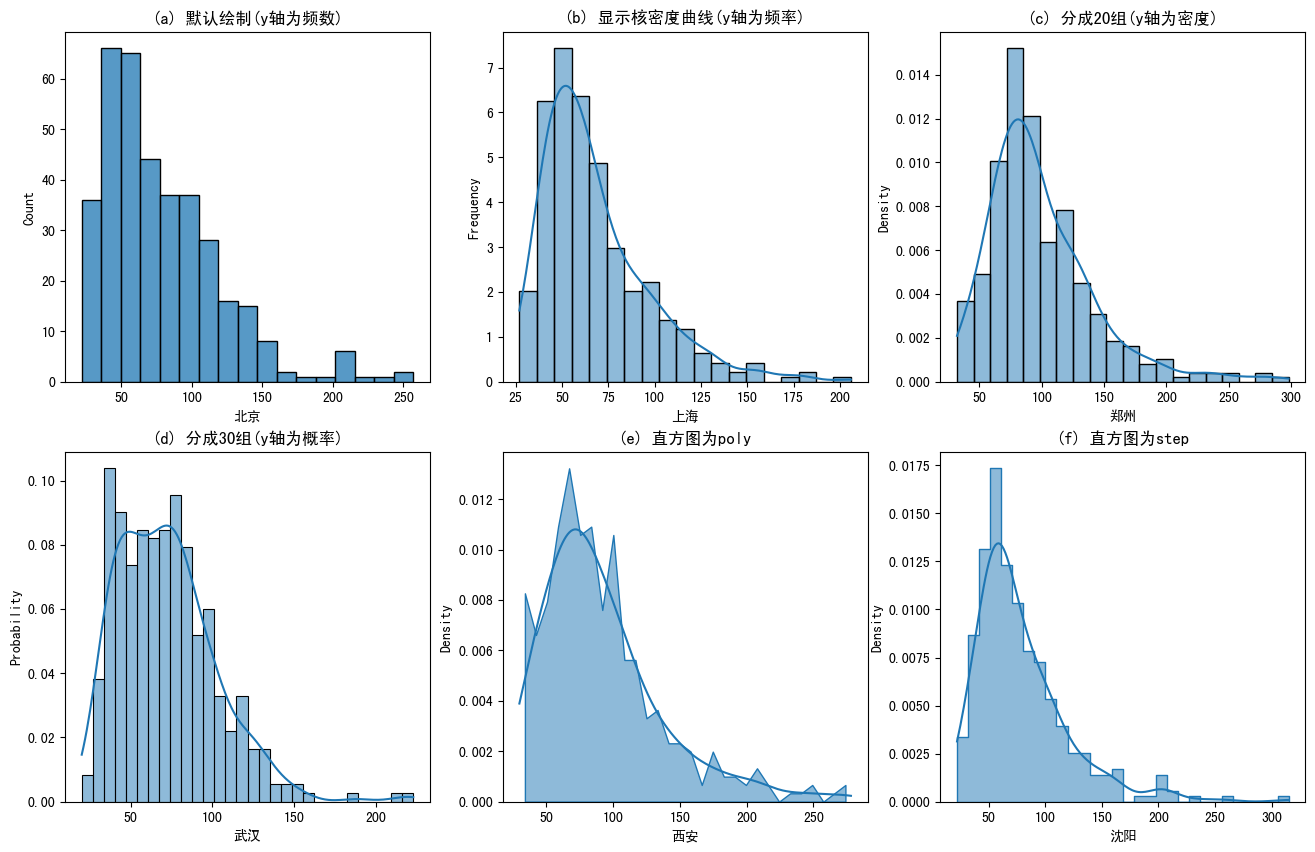

In [9]:
plt.subplots(2, 3, figsize=(16, 10)) # 设置画布大小 2行3列

plt.subplot(231) # 2行3列第1个图
sns.histplot(df['北京']) # 绘制直方图
plt.title('(a) 默认绘制(y轴为频数)') # 设置标题

plt.subplot(232) # 2行3列第2个图
sns.histplot(df['上海'], kde=True, stat='frequency') # 绘制直方图
plt.title('(b) 显示核密度曲线(y轴为频率)') # 设置标题

plt.subplot(233) # 2行3列第3个图
sns.histplot(df['郑州'], bins=20, kde=True, stat='density') # 绘制直方图
plt.title('(c) 分成20组(y轴为密度)') # 设置标题

plt.subplot(234) # 2行3列第4个图
sns.histplot(df['武汉'], bins=30, kde=True, stat='probability') # 绘制直方图
plt.title('(d) 分成30组(y轴为概率)') # 设置标题

plt.subplot(235) # 2行3列第5个图
sns.histplot(df['西安'], bins=30, kde=True, stat='density', element='poly') # 绘制直方图
plt.title('(e) 直方图为poly') # 设置标题

plt.subplot(236) # 2行3列第6个图
sns.histplot(df['沈阳'], bins=30, kde=True, stat='density', element='step') # 绘制直方图
plt.title('(f) 直方图为step') # 设置标题

plt.show() # 显示图形

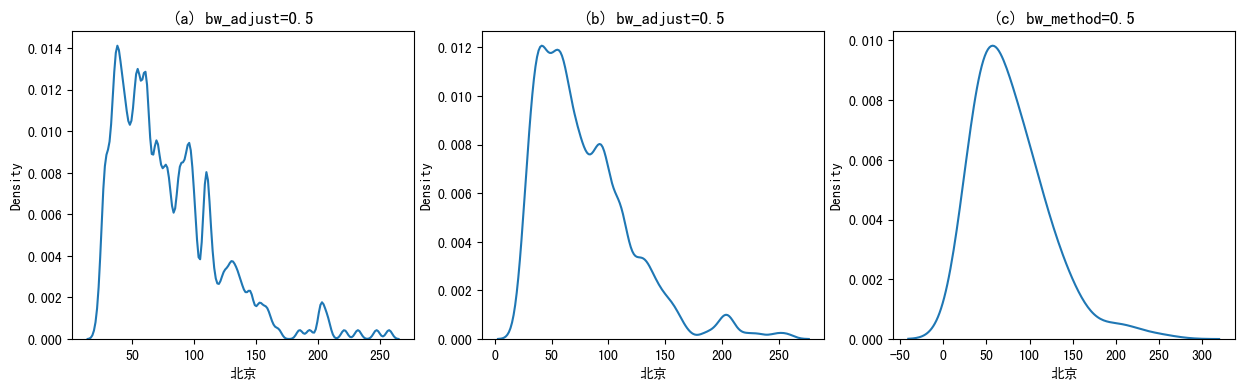

In [11]:
plt.subplots(1, 3, figsize=(15, 4)) # 设置画布大小 1行3列

plt.subplot(131) # 1行3列第1个图
sns.kdeplot(df['北京'], bw_adjust=0.2) # 绘制核密度图
plt.title('(a) bw_adjust=0.5') # 设置标题

plt.subplot(132) # 1行3列第2个图
sns.kdeplot(df['北京'], bw_adjust=0.5) # 绘制核密度图
plt.title('(b) bw_adjust=0.5') # 设置标题

plt.subplot(133) # 1行3列第3个图
sns.kdeplot(df['北京'], bw_method=0.5) # 绘制核密度图
plt.title('(c) bw_method=0.5') # 设置标题

plt.show() # 显示图形

In [14]:
example2_3 = pd.read_csv('./pydata/chap02/example2_3.csv', encoding='gbk') # 读取csv文件
df = pd.melt(example2_3, value_vars=['北京', '上海', '郑州', '武汉', '西安', '沈阳'], var_name='城市', value_name='AQI') # 转换数据格式
df.head() # 显示前5行

,城市,AQI
0,北京,62
1,北京,80
2,北京,82
3,北京,74
4,北京,83


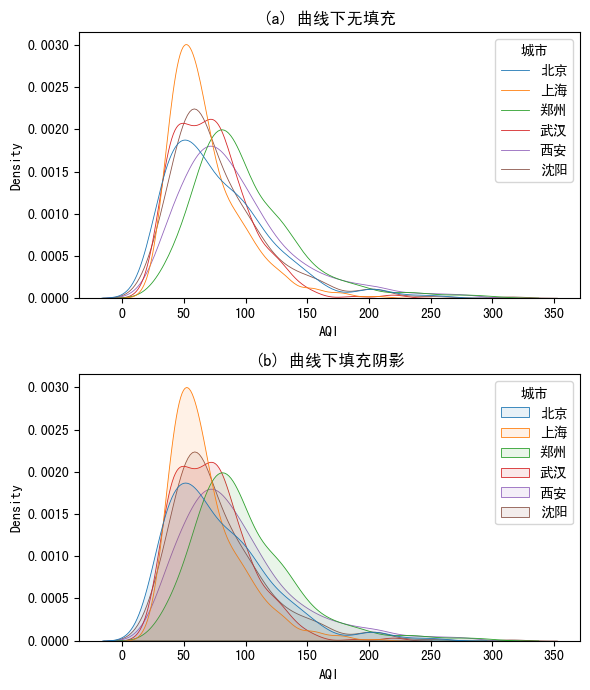

In [17]:
plt.subplots(2, 1, figsize=(6, 7)) # 设置画布大小 2行1列

plt.subplot(211) # 2行1列第1个图
sns.kdeplot(x='AQI', hue='城市', linewidth=0.6, data=df) # 绘制核密度图
plt.title('(a) 曲线下无填充') # 设置标题

plt.subplot(212) # 2行1列第2个图
sns.kdeplot(x='AQI', hue='城市', fill=True, alpha=0.1, linewidth=0.6, data=df) # 绘制核密度图
plt.title('(b) 曲线下填充阴影') # 设置标题

plt.tight_layout() # 紧缩布局
plt.show() # 显示图形

### 2.2.2 箱线图和小提琴图

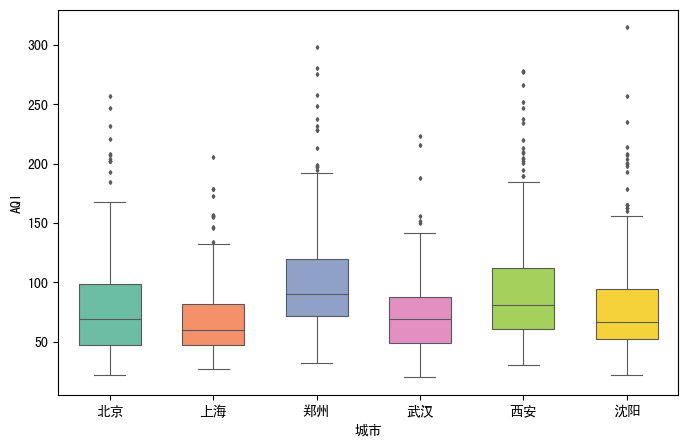

In [18]:
plt.figure(figsize=(8, 5)) # 设置画布大小

sns.boxplot(
    x='城市', y='AQI', 
    width=0.6, saturation=0.9, fliersize=2,
    linewidth=0.8, notch=False,
    palette="Set2", orient="v",
    data=df
) # 绘制箱线图
plt.show() # 显示图形

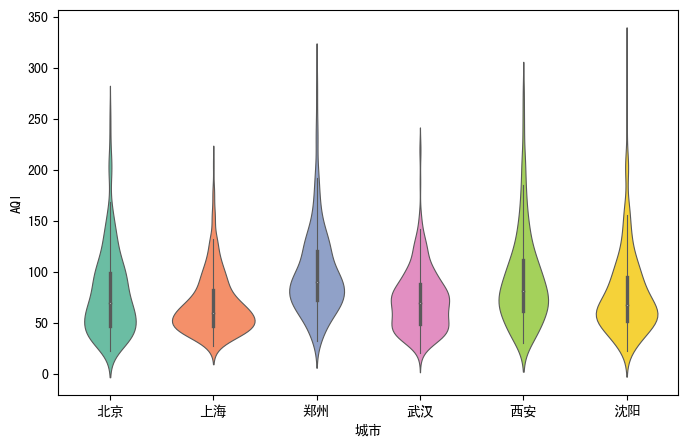

In [19]:
plt.figure(figsize=(8, 5)) # 设置画布大小

sns.violinplot(
    x='城市', y='AQI',
    width=0.8, saturation=0.9, fliersize=2,
    linewidth=0.8, palette="Set2", orient="v",
    inner="box", data=df
) # 绘制小提琴图
plt.show() # 显示图形

### 2.2.3 点图

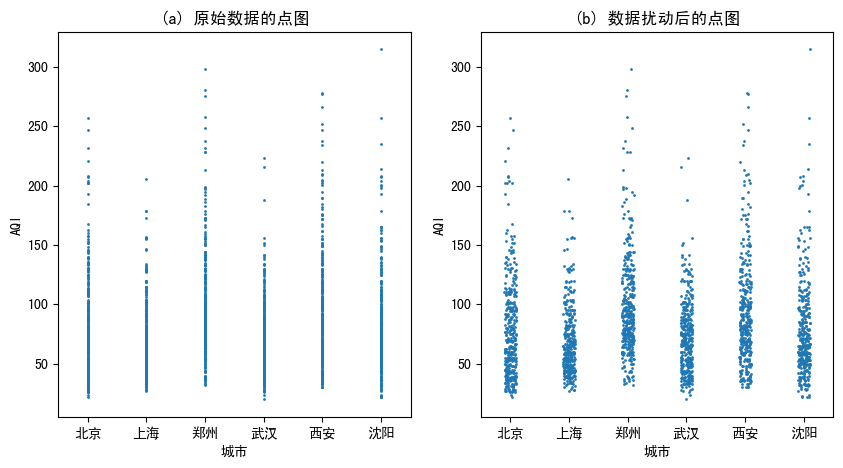

In [20]:
plt.figure(figsize=(10, 5)) # 设置画布大小

plt.subplot(121) # 1行2列第1个图
sns.stripplot(
    x='城市', y='AQI',
    jitter=False, size=2,
    data=df
) # 绘制散点图
plt.title('(a) 原始数据的点图') # 设置标题

plt.subplot(122) # 1行2列第2个图
sns.stripplot(
    x='城市', y='AQI',
    jitter=True, size=2,
    data=df
) # 绘制散点图
plt.title('(b) 数据扰动后的点图') # 设置标题

plt.show() # 显示图形

## 2.3 变量间关系可视化

### 2.3.1 散点图

In [21]:
df = pd.read_csv('./pydata/chap02/example2_4.csv', encoding='gbk') # 读取csv文件
df.head() # 显示前5行

,总股本,每股收益,每股净资产,每股现金流量
0,3.21,1.82,11.21,3.42
1,5.37,0.70,3.96,2.99
2,8.18,0.94,7.85,3.05
3,2.74,1.95,10.24,3.36
4,4.84,0.90,11.52,3.56


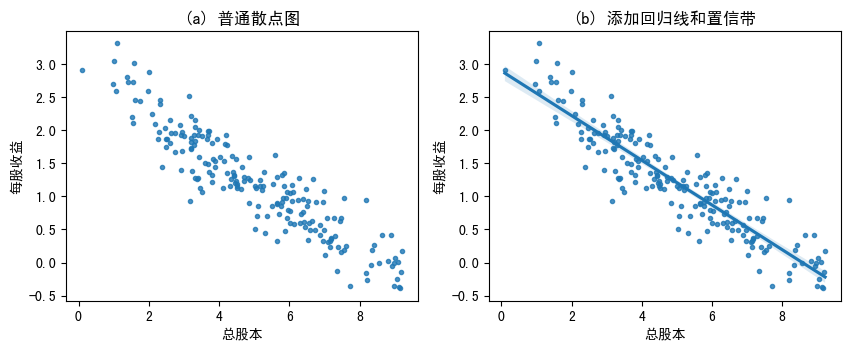

In [22]:
plt.subplots(1, 2, figsize=(10, 3.5)) # 设置画布大小 1行2列

plt.subplot(121) # 1行2列第1个图
sns.regplot(
    x='总股本', y='每股收益',
    fit_reg=False, marker='.', data=df
) # 绘制散点图
plt.title('(a) 普通散点图') # 设置标题

plt.subplot(122) # 1行2列第2个图
sns.regplot(
    x='总股本', y='每股收益',
    fit_reg=True, marker='.', data=df
) # 绘制散点图 添加回归线 和 置信带
plt.title('(b) 添加回归线和置信带') # 设置标题

plt.show() # 显示图形

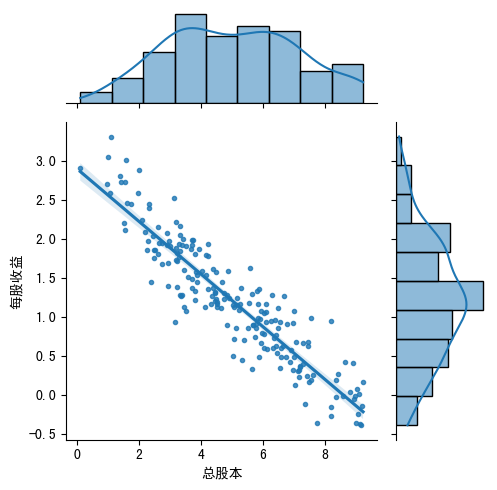

In [24]:
sns.jointplot(
    x='总股本', y='每股收益',
    marker='.', kind='reg', 
    height=5, ratio=3,
    data=df
) # 绘制散点图
plt.show() # 显示图形

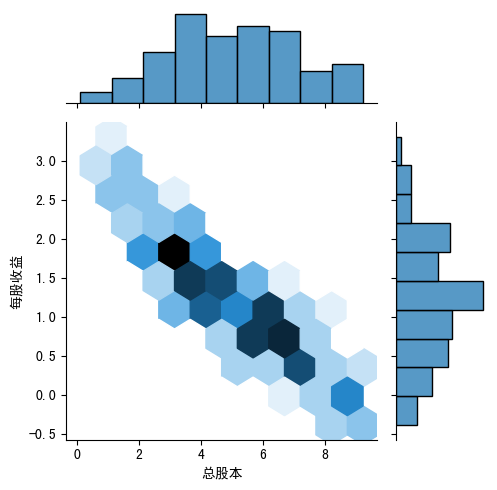

In [25]:
sns.jointplot(
    x='总股本', y='每股收益',
    kind='hex', height=5, ratio=3,
    data=df
) # 绘制散点图
plt.show() # 显示图形

### 2.3.2 散点图矩阵

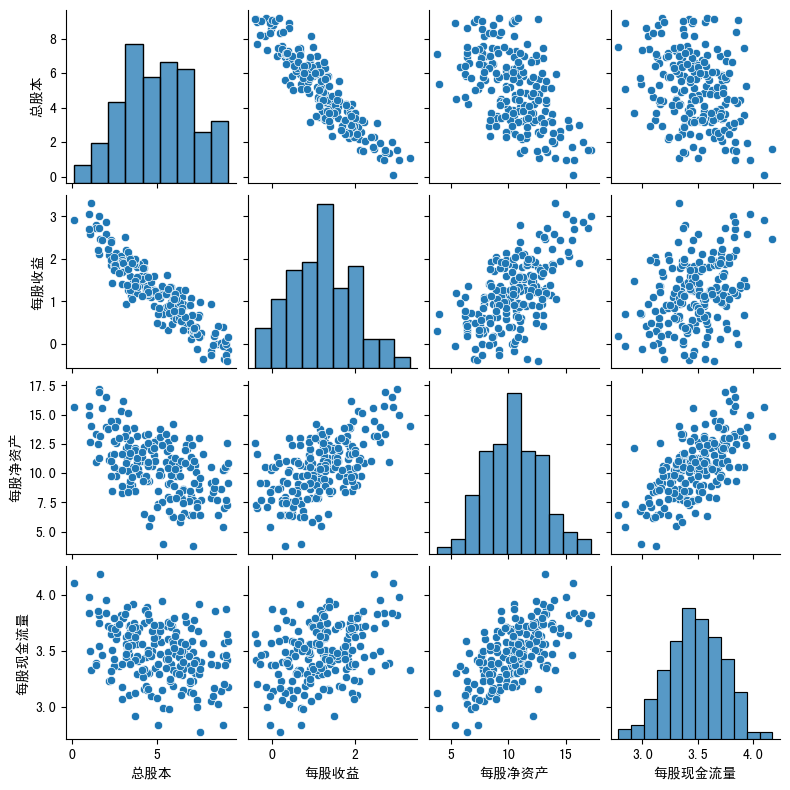

In [26]:
sns.pairplot(
    df[['总股本', '每股收益', '每股净资产', '每股现金流量']],
    height=2, diag_kind="hist", kind="scatter"
) # 绘制散点图矩阵 对角线为直方图
plt.show() # 显示图形

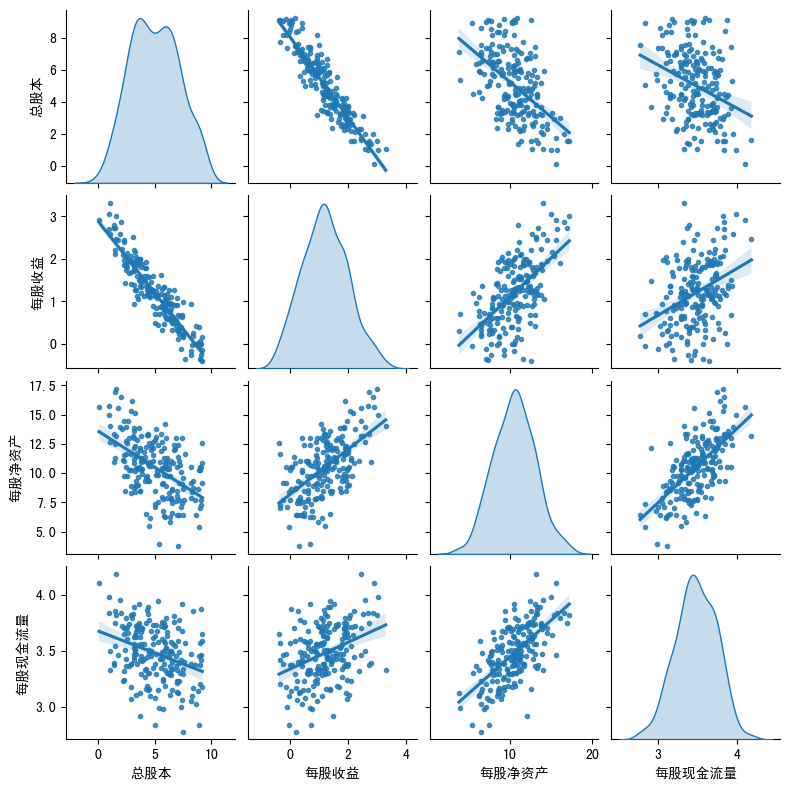

In [27]:
sns.pairplot(
    df[['总股本', '每股收益', '每股净资产', '每股现金流量']],
    height=2, diag_kind="kde", kind="reg", markers="."
) # 绘制散点图矩阵 对角线为核密度图
plt.show() # 显示图形

### 2.3.3 气泡图和3D散点图

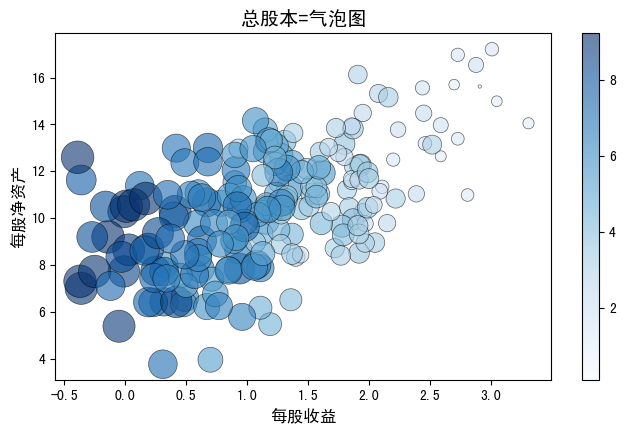

In [28]:
plt.figure(figsize=(8, 4.5)) # 设置画布大小
plt.scatter(
    x='每股收益', y='每股净资产',
    c='总股本', s=df['总股本']*60,
    cmap='Blues', edgecolors='k',
    linewidths=0.5, alpha=0.6,
    data=df
) # 绘制散点图
plt.colorbar() # 显示颜色条

plt.xlabel('每股收益', fontsize=12) # 设置x轴标签
plt.ylabel('每股净资产', fontsize=12) # 设置y轴标签
plt.title('总股本=气泡图', fontsize=14) # 设置标题

plt.show() # 显示图形

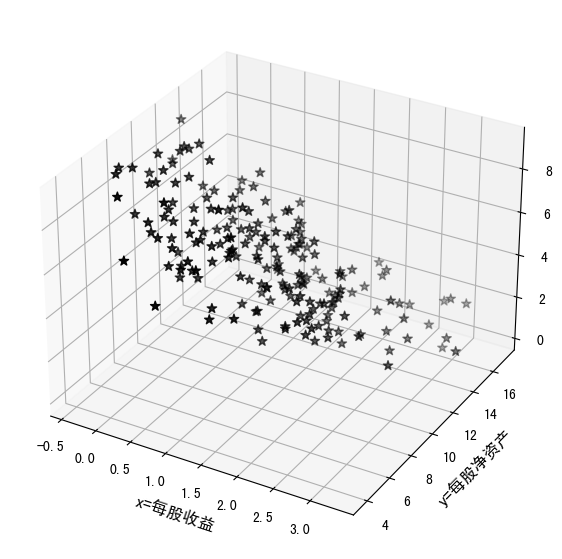

In [49]:
ax3d = plt.figure(figsize=(10, 7)).add_subplot(111, projection='3d') # 设置画布大小
ax3d.scatter(
    xs=df['每股收益'], ys=df['每股净资产'], zs=df['总股本'],
    color='black', marker='*', s=50
)
ax3d.set_xlabel('x=每股收益', fontsize=12) # 设置x轴标签
ax3d.set_ylabel('y=每股净资产', fontsize=12) # 设置y轴标签
ax3d.set_zlabel('z=总股本', fontsize=12, rotation=90) # 设置z轴标签
plt.show()

## 2.4 样本相似性可视化

### 2.4.1 轮廓图

In [2]:
df = pd.read_csv('./pydata/chap02/example2_2.csv', encoding='gbk') # 读取csv文件
df.head() # 显示前5行

,支出项目,北京,天津,上海,重庆
0,食品烟酒,8488.5,8983.7,10952.6,6666.7
1,衣着,2229.5,1999.5,2071.8,1491.9
2,居住,15751.4,6946.1,15046.4,3851.2
3,生活用品及服务,2387.3,1956.7,2122.8,1392.5
4,交通通信,4979.0,4236.4,5355.7,2632.8


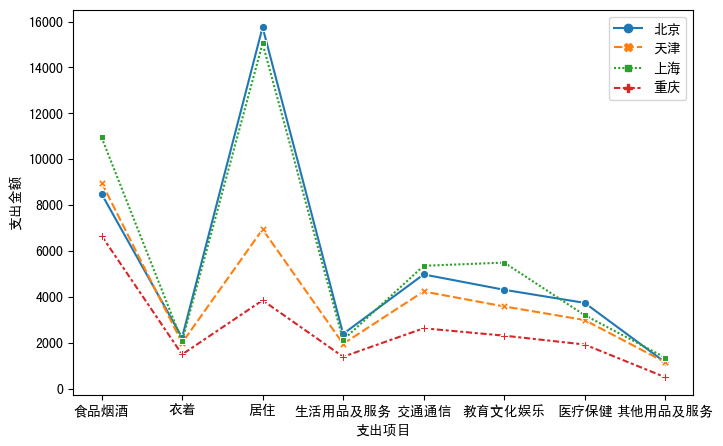

In [3]:
plt.figure(figsize=(8, 5)) # 设置画布大小

dfs = [df['北京'], df['天津'], df['上海'], df['重庆']] # 选取4个城市的数据
sns.lineplot(data=dfs, markers=True) # 绘制折线图
plt.xlabel('支出项目') # 设置x轴标签
plt.ylabel('支出金额') # 设置y轴标签
plt.xticks(range(8), df['支出项目']) # 设置x轴刻度

plt.show() # 显示图形

### 2.4.2 雷达图

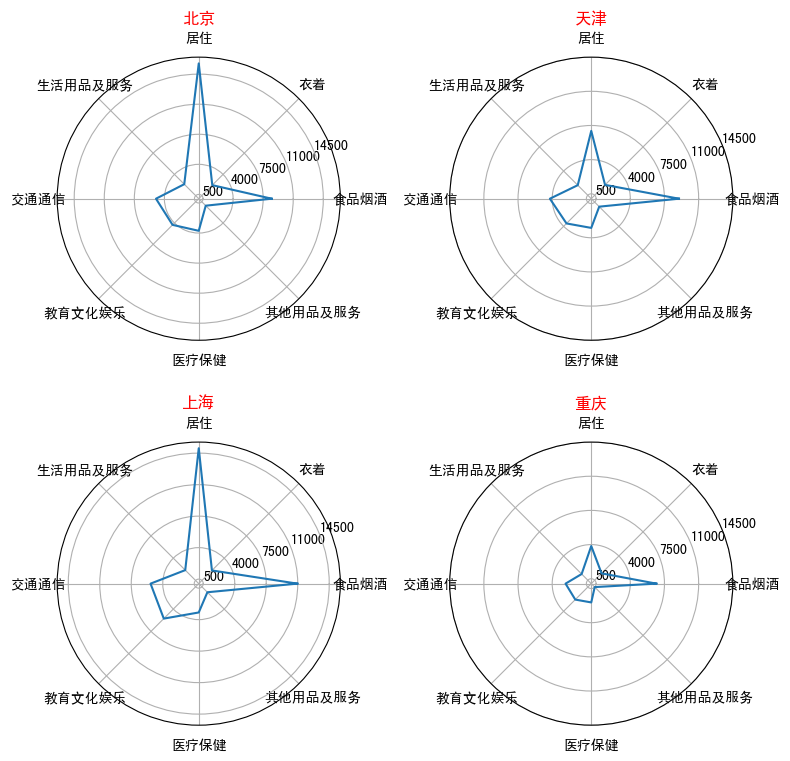

In [13]:
# 创建角度
names = list(df.columns[1:]) # 选取城市名称
values = list(df.values[:, 1:].T) # 选取属性值
attributes = list(df.values[:, 0]) # 选取属性名称
angles = [n / float(len(attributes)) * 2 * np.pi for n in range(len(attributes))] # 计算角度

# 关闭画图
angles += angles[:1] # 闭合
values = np.asarray(values) # 转换为数组
values = np.concatenate((values, values[:, 0:1]), axis=1) # 闭合

# 创建图形
plt.figure(figsize=(8, 8)) # 设置画布大小

for i in range(4):
    ax = plt.subplot(2, 2, i+1, polar=True) # 设置子图
    ax.plot(angles, values[i]) # 绘制折线图
    ax.set_yticks(np.arange(500, 16000, 3500))
    ax.set_xticks(angles[:-1])
    ax.set_xticklabels(attributes)
    ax.set_title(names[i], fontsize=12, color='red') # 设置标题
    plt.tight_layout()
plt.show()

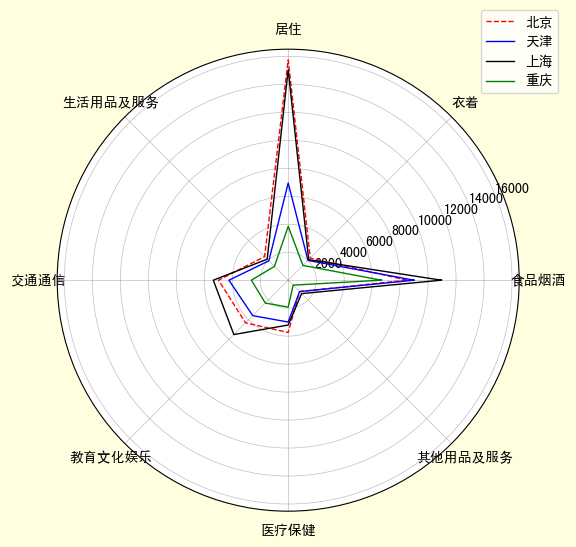

In [14]:
labels = np.array(df['支出项目']) # 选取属性名称
datalenth = 8 # 数据长度

df1 = np.array(df['北京']) # 选取北京数据
df2 = np.array(df['天津']) # 选取天津数据
df3 = np.array(df['上海']) # 选取上海数据
df4 = np.array(df['重庆']) # 选取重庆数据

angles = np.linspace(0, 2*np.pi, datalenth, endpoint=False) # 计算角度
df1 = np.concatenate((df1, [df1[0]])) # 闭合
df2 = np.concatenate((df2, [df2[0]])) # 闭合
df3 = np.concatenate((df3, [df3[0]])) # 闭合
df4 = np.concatenate((df4, [df4[0]])) # 闭合
angles = np.concatenate((angles, [angles[0]])) # 闭合

plt.figure(figsize=(6, 6), facecolor='lightyellow')
plt.polar(angles, df1, 'r--', linewidth=1, label='北京') # 绘制折线图
plt.polar(angles, df2, 'b', linewidth=1, label='天津') # 绘制折线图
plt.polar(angles, df3, 'k', linewidth=1, label='上海') # 绘制折线图
plt.polar(angles, df4, 'g', linewidth=1, label='重庆') # 绘制折线图
plt.thetagrids(range(0, 360, 45), labels) # 设置极坐标轴
plt.grid(linestyle='-', linewidth=0.5, color='grey', alpha=0.5) # 设置网格线
plt.legend(loc='upper right', bbox_to_anchor=(1.1, 1.1)) # 设置图例位置

plt.show() # 显示图形

## 2.5 时间序列可视化

### 2.5.1 折线图

In [18]:
df = pd.read_csv('./pydata/chap02/example2_6.csv', encoding='gbk') # 读取csv文件
df.head() # 显示前5行

,年份,城镇居民消费水平,农村居民消费水平
0,2000,6972,1917
1,2001,7272,2032
2,2002,7662,2157
3,2003,7977,2292
4,2004,8718,2521


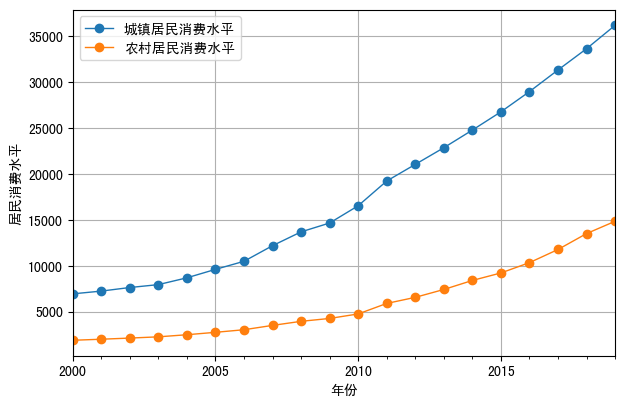

In [19]:
df['年份'] = pd.to_datetime(df['年份'], format='%Y') # 转换为日期格式
df = df.set_index('年份') # 设置索引

df.plot(
    kind='line', figsize=(7, 4.5), grid=True,
    stacked=False, linewidth=1, marker='o', markersize=6,
    xlabel='年份', ylabel='居民消费水平'
)
plt.show() # 显示图形

### 2.5.2 面积图

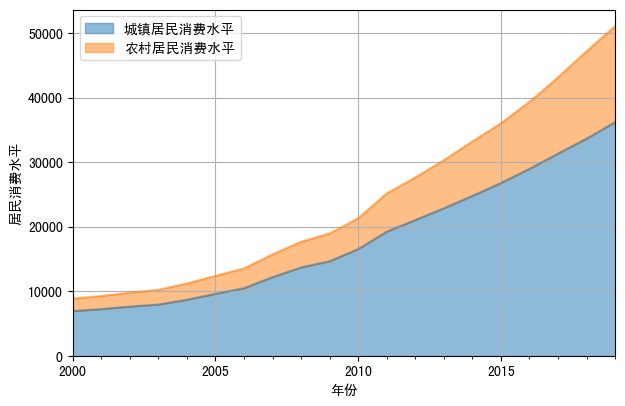

In [20]:
df.plot(
    kind = 'area', figsize=(7, 4.5), grid=True,
    stacked=True, alpha=0.5, 
    xlabel='年份', ylabel='居民消费水平'
)
plt.show() # 显示图形

## 2.6 可视化注意事项

## 习题

### 2.1

In [22]:
df = pd.read_csv('./exercise/chap02/exercise2_1.csv', encoding='gbk', index_col=0) # 读取csv文件
df.head() # 显示前5行

,Class,Sex,Age,Survived
1,3rd,Male,Child,No
2,3rd,Male,Child,No
3,3rd,Male,Child,No
4,3rd,Male,Child,No
5,3rd,Male,Child,No


In [23]:
# （1）绘制sex和survived的并列条形图和堆叠条形图
ct = pd.crosstab(df['Sex'], df['Survived']) # 交叉表
ct

Survived,No,Yes
Sex,,
Female,126,344
Male,1364,367


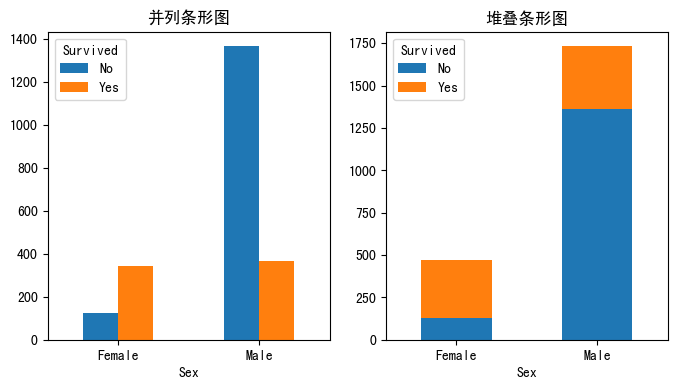

In [24]:
plt.figure(figsize=(8, 4)) # 设置画布大小

ax1 = plt.subplot(121) # 设置子图1
ct.plot(kind='bar', ax=ax1, rot=0) # 绘制并列条形图
plt.title('并列条形图') # 设置标题

ax2 = plt.subplot(122) # 设置子图2
ct.plot(kind='bar', ax=ax2, rot=0, stacked=True) # 绘制堆叠条形图
plt.title('堆叠条形图') # 设置标题

plt.show()

In [25]:
# （2）选择适当的变量绘制饼图和环形图
# 这里以class和age为例
class_df = df.groupby('Class').size() # 按Pclass分组
class_df

Class
1st     325
2nd     285
3rd     706
Crew    885
dtype: int64

In [26]:
age_df = df.groupby('Age').size() # 按Age分组
age_df

Age
Adult    2092
Child     109
dtype: int64

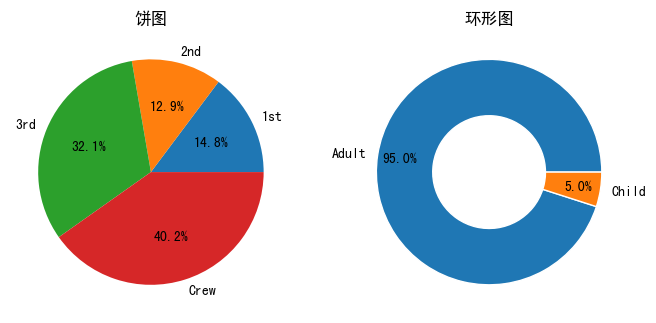

In [28]:
plt.figure(figsize=(8, 4)) # 设置画布大小

plt.subplot(121) # 设置子图1
plt.pie(class_df, labels=class_df.index, autopct='%1.1f%%') # 绘制饼图
plt.title('饼图') # 设置标题

plt.subplot(122) # 设置子图2
plt.pie(
    age_df, labels=age_df.index, autopct='%1.1f%%',
    pctdistance=0.8, labeldistance=1.1,
    wedgeprops={'width': 0.5, 'edgecolor': 'w'}
) # 绘制环形图
plt.title('环形图') # 设置标题

plt.show()

### 2.2

In [30]:
df = pd.read_csv('./exercise/chap02/exercise2_2.csv', encoding='gbk', index_col=0) # 读取csv文件
df.head() # 显示前5行

,eruptions,waiting
1,3.600,79
2,1.800,54
3,3.333,74
4,2.283,62
5,4.533,85


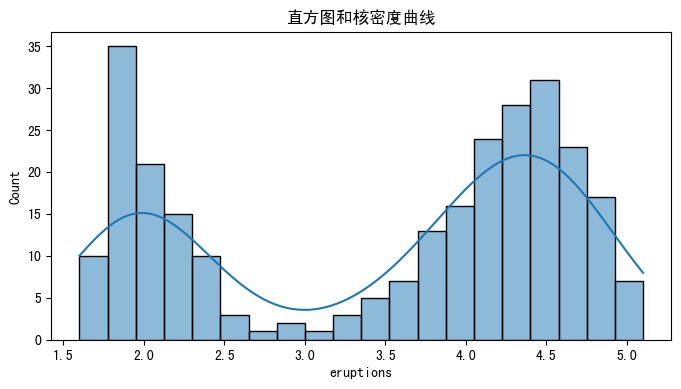

In [33]:
# （1）绘制eruptions的直方图，并作直方图核密度曲线
plt.figure(figsize=(8, 4)) # 设置画布大小

sns.histplot(df['eruptions'], bins=20, kde=True) # 绘制直方图和核密度曲线
plt.title('直方图和核密度曲线') # 设置标题

plt.show()

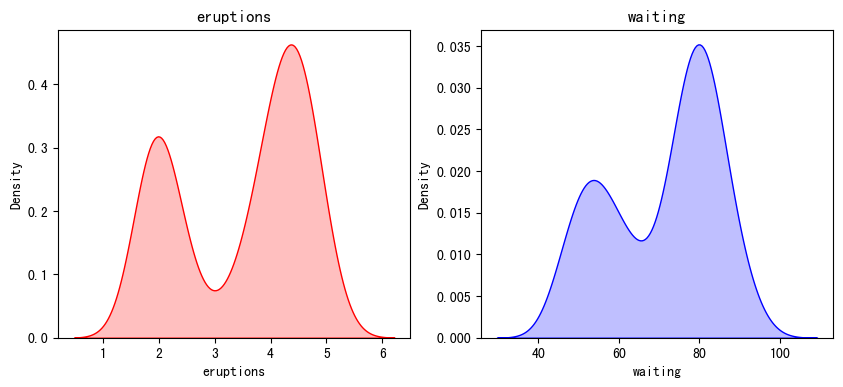

In [37]:
# （2）绘制eruptions和waiting两个变量的核密度比较曲线
plt.figure(figsize=(10, 4)) # 设置画布大小

plt.subplot(121) # 设置子图1
sns.kdeplot(df['eruptions'], fill=True, color='r', label='eruptions') # 绘制核密度曲线
plt.title('eruptions') # 设置标题

plt.subplot(122) # 设置子图2
sns.kdeplot(df['waiting'], fill=True, color='b', label='waiting') # 绘制核密度曲线
plt.title('waiting') # 设置标题

plt.show()

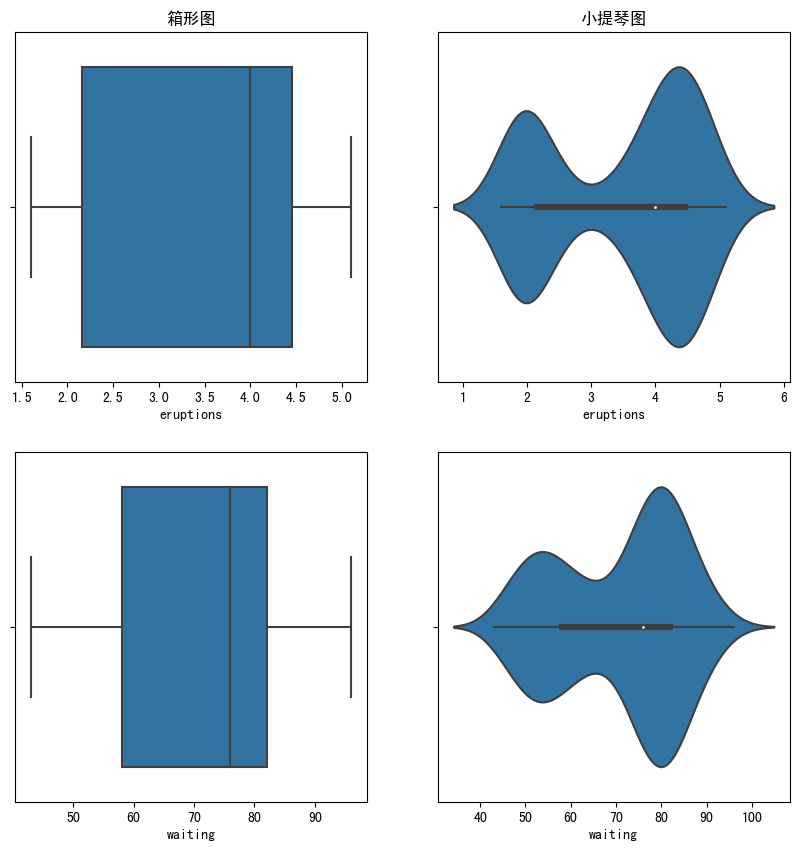

In [38]:
# 绘制eruptions和waiting两个变量的箱形图和小提琴图
plt.figure(figsize=(10, 10)) # 设置画布大小

plt.subplot(221) # 设置子图1
sns.boxplot(x='eruptions', data=df) # 绘制箱形图
plt.title('箱形图') # 设置标题

plt.subplot(222) # 设置子图2
sns.violinplot(x='eruptions', data=df) # 绘制小提琴图
plt.title('小提琴图') # 设置标题

plt.subplot(223) # 设置子图3
sns.boxplot(x='waiting', data=df) # 绘制箱形图

plt.subplot(224) # 设置子图4
sns.violinplot(x='waiting', data=df) # 绘制小提琴图

plt.show()

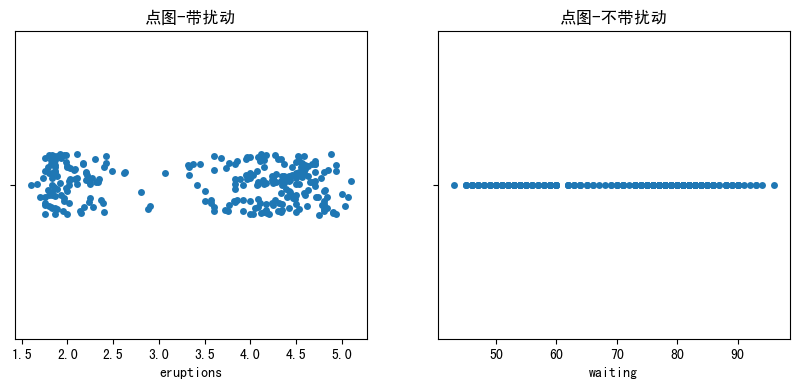

In [42]:
# （3）绘制eruptions和waiting两个变量的点图
plt.figure(figsize=(10, 4)) # 设置画布大小

plt.subplot(121) # 设置子图1
sns.stripplot(x='eruptions', data=df, jitter=True) # 绘制点图
plt.title('点图-带扰动') # 设置标题

plt.subplot(122) # 设置子图2
sns.stripplot(x='waiting', data=df, jitter=False) # 绘制点图
plt.title('点图-不带扰动') # 设置标题

plt.show()

### 2.3

In [2]:
df = pd.read_csv('./exercise/chap02/exercise2_3.csv', encoding='gbk', index_col=0) # 读取csv文件
df.head() # 显示前5行

,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2


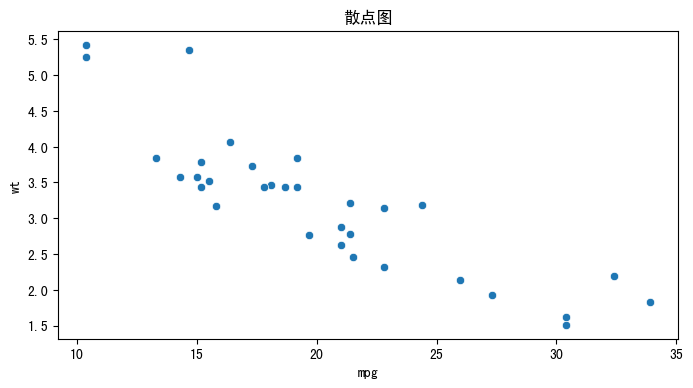

In [3]:
# （1）绘制每加仑油行驶的英里数（mpg）和汽车自重（wt）两个变量的散点图
plt.figure(figsize=(8, 4)) # 设置画布大小

sns.scatterplot(x='mpg', y='wt', data=df) # 绘制散点图
plt.title('散点图') # 设置标题

plt.show() # 显示图形

<Figure size 800x800 with 0 Axes>

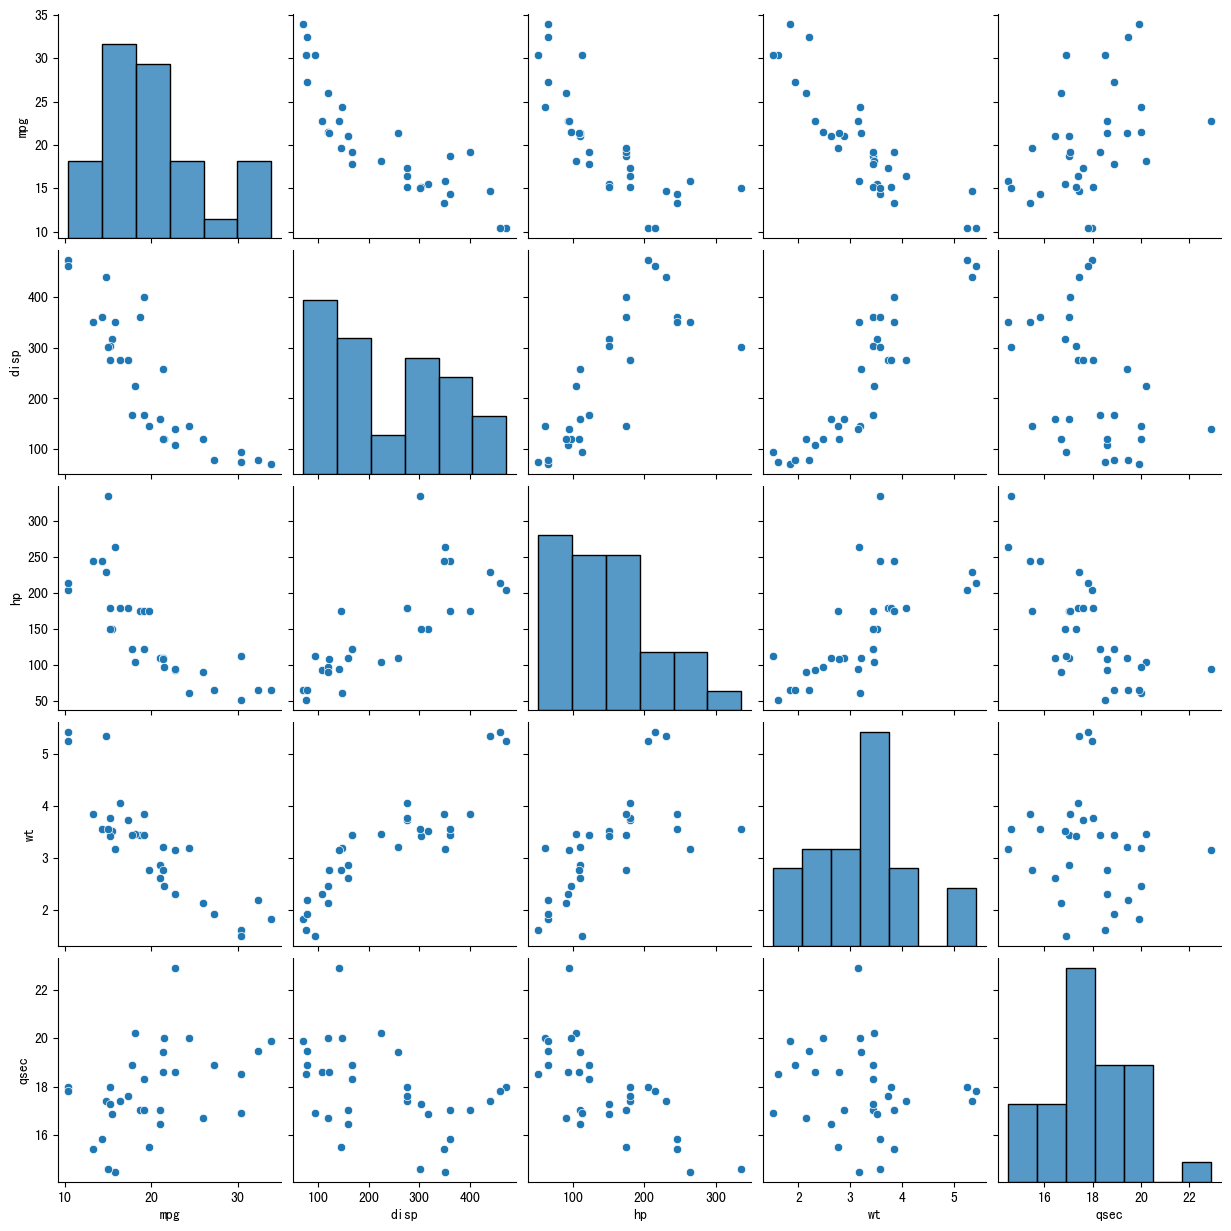

In [5]:
# （2）绘制该数据集的散点图矩阵
# 这里以mpg、disp、hp、wt、qsec为例
plt.figure(figsize=(8, 8)) # 设置画布大小

sns.pairplot(df[['mpg', 'disp', 'hp', 'wt', 'qsec']]) # 绘制散点图矩阵
plt.show() # 显示图形

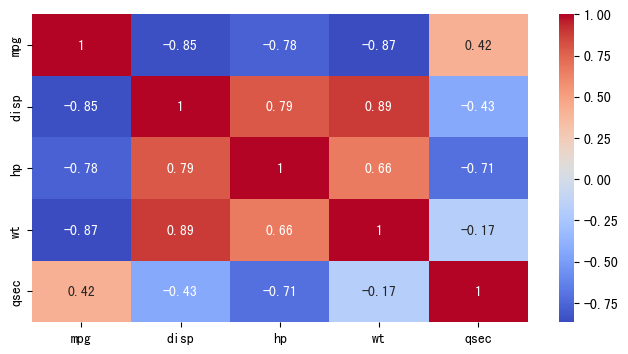

In [8]:
# （3）绘制该数据集的相关系数矩阵图
# 这里以mpg、disp、hp、wt、qsec为例
plt.figure(figsize=(8, 4)) # 设置画布大小

sns.heatmap(
    df[['mpg', 'disp', 'hp', 'wt', 'qsec']].corr(), 
    annot=True, cmap = 'coolwarm'
) # 绘制相关系数矩阵图
plt.show()

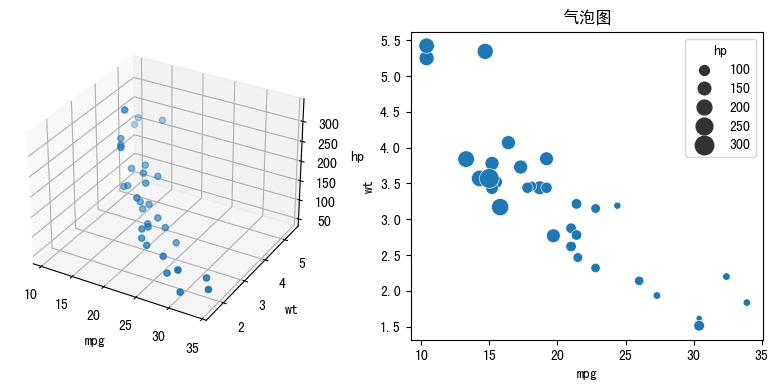

In [11]:
# （4）绘制每加仑油行驶的英里数（mpg）、总马力（hp）和汽车自重（wt）3个变量的气泡图和3D散点图
plt.figure(figsize=(10, 4)) # 设置画布大小

plt.subplot(122) # 设置子图1
sns.scatterplot(x='mpg', y='wt', size='hp', data=df, sizes=(20, 200)) # 绘制气泡图
plt.title('气泡图') # 设置标题

ax3d = plt.subplot(121, projection='3d') # 设置子图2
ax3d.scatter(
    df['mpg'], df['wt'], df['hp']
)
ax3d.set_xlabel('mpg') # 设置x轴标签
ax3d.set_ylabel('wt') # 设置y轴标签
ax3d.set_zlabel('hp') # 设置z轴标签

plt.show()


### 2.4

In [13]:
df = pd.read_csv('./exercise/chap02/exercise2_4.csv', encoding='gbk') # 读取csv文件
df.head() # 显示前5行

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [17]:
species_df = df.groupby('Species').mean().T # 按照species分组，计算均值
species_df.head() # 显示前5行

Species,setosa,versicolor,virginica
Sepal.Length,5.006,5.936,6.588
Sepal.Width,3.428,2.770,2.974
Petal.Length,1.462,4.260,5.552
Petal.Width,0.246,1.326,2.026


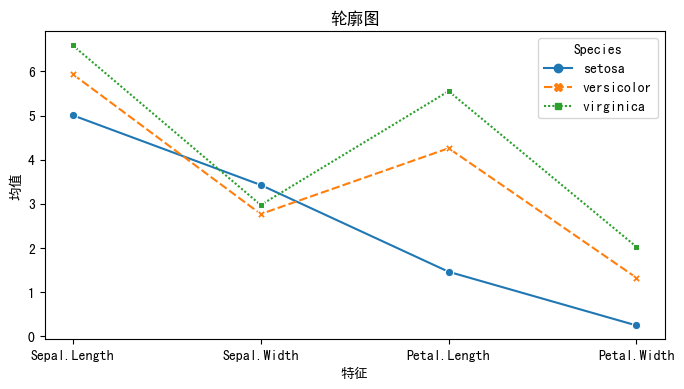

In [18]:
# 绘制轮廓图
plt.figure(figsize=(8, 4)) # 设置画布大小

sns.lineplot(data=species_df, markers=True)
plt.xlabel('特征') # 设置x轴标签
plt.ylabel('均值') # 设置y轴标签
plt.title('轮廓图') # 设置标题

plt.show()

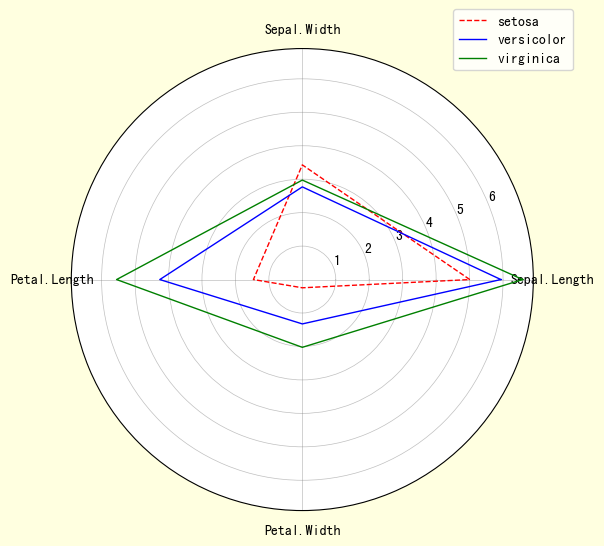

In [20]:
labels = np.array(species_df.index)
df1 = np.array(species_df['setosa']) # 提取setosa的数据
df2 = np.array(species_df['versicolor']) # 提取versicolor的数据
df3 = np.array(species_df['virginica']) # 提取virginica的数据

angles = np.linspace(0, 2*np.pi, 4, endpoint=False)
df1 = np.concatenate((df1, [df1[0]])) # 闭合
df2 = np.concatenate((df2, [df2[0]])) # 闭合
df3 = np.concatenate((df3, [df3[0]])) # 闭合
angles = np.concatenate((angles, [angles[0]])) # 闭合

plt.figure(figsize=(6, 6), facecolor='lightyellow') # 设置画布大小和背景色
plt.polar(angles, df1, 'r--', linewidth=1, label='setosa') # 绘制折线图
plt.polar(angles, df2, 'b', linewidth=1, label='versicolor') # 绘制折线图
plt.polar(angles, df3, 'g', linewidth=1, label='virginica') # 绘制折线图
plt.thetagrids(range(0, 360, 90), labels)
plt.grid(linestyle='-', linewidth=0.5, color='grey', alpha=0.5)
plt.legend(loc='upper right', bbox_to_anchor=(1.1, 1.1))

plt.show()

### 2.5

In [21]:
df = pd.read_csv('./pydata/chap02/example2_3.csv', encoding='gbk') # 读取csv文件
df.head()

,日期,北京,上海,郑州,武汉,西安,沈阳
0,2020/1/1,62,54,73,73,117,109
1,2020/1/2,80,82,124,105,149,214
2,2020/1/3,82,72,192,130,209,204
3,2020/1/4,74,88,249,142,252,207
4,2020/1/5,83,63,276,80,152,198


In [23]:
df['日期'] = pd.to_datetime(df['日期']) # 将日期转换为日期格式
df = df.set_index('日期') # 将日期设置为索引
df.head()

,北京,上海,郑州,武汉,西安,沈阳
日期,,,,,,
2020-01-01,62,54,73,73,117,109
2020-01-02,80,82,124,105,149,214
2020-01-03,82,72,192,130,209,204
2020-01-04,74,88,249,142,252,207
2020-01-05,83,63,276,80,152,198


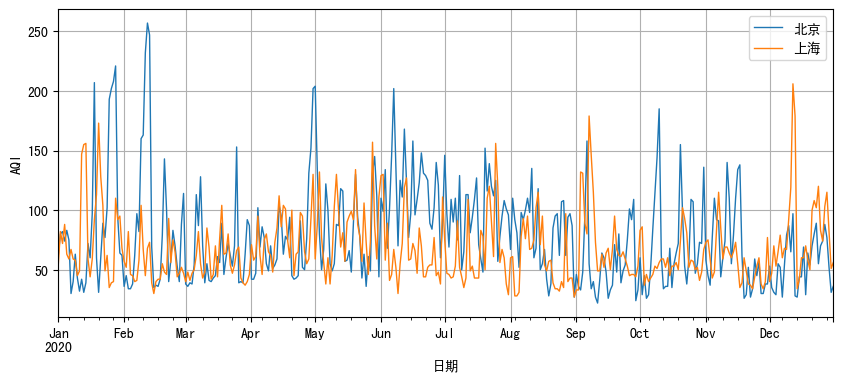

In [28]:
# 这里以北京、上海为例
dfs = df[['北京', '上海']] # 提取数据
dfs.plot(
    kind='line', figsize=(10, 4), grid=True,
    stacked=False, linewidth=1,
    xlabel='日期', ylabel='AQI'
)
plt.show()

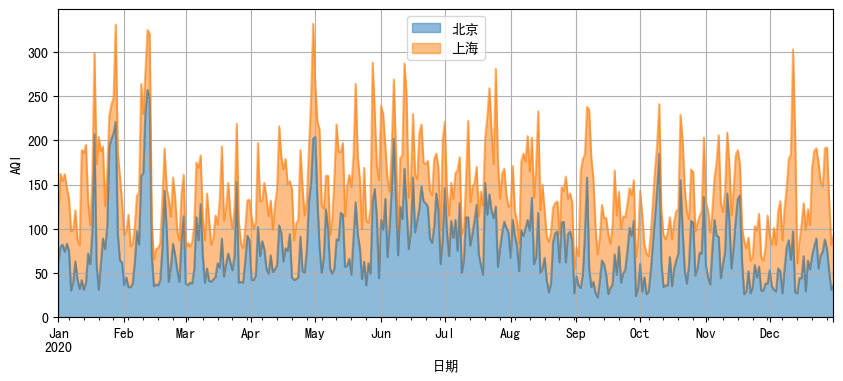

In [30]:
dfs.plot(
    kind='area', figsize=(10, 4), grid=True,
    stacked=True, alpha=0.5,
    xlabel='日期', ylabel='AQI'
)
plt.show()